In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


dataframe = pd.read_csv("../dados/07-03-CC_GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [2]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [6]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

# vai de -1 até 1
# quanto mais próximo de 1 estiver o valor de silhouette mais separados estão os clusters

0.36443927743081506


In [7]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0758787031571042


In [8]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.782548172111


In [9]:
# Comparando as 3 metricas
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean') # mais proximo 1 melhor - é o mais utilizados
    dbs = metrics.davies_bouldin_score(dataset, labels) # mais proximo de 0 melhor
    calinski = metrics.calinski_harabasz_score(dataset, labels) # quanto maior melhor
    return s, dbs, calinski

In [10]:
# Comparando os valores com outros números de cluster
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.440519908274


In [11]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36459930079687725 1.0756029772618625 3431.7860454296674


In [12]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.24714064224918977 1.2174884032700275 1607.945079863482


In [13]:
import numpy as np
random_data = np.random.rand(8950, 16) # 8950 quantidade de registros 
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039688504090196086 3.482534169553778 300.986129007276
0.36459930079687725 1.0756029772618625 3431.7860454296674


In [14]:
set1, set2, set3 = np.array_split(values, 3) # values valores normalizados
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36897094584161894 1.0581656052369077 1204.0560966145406
0.35416642754504835 1.1382306445993162 1194.951986504888
0.36685269244474583 1.0988027839846315 1167.5299723518194


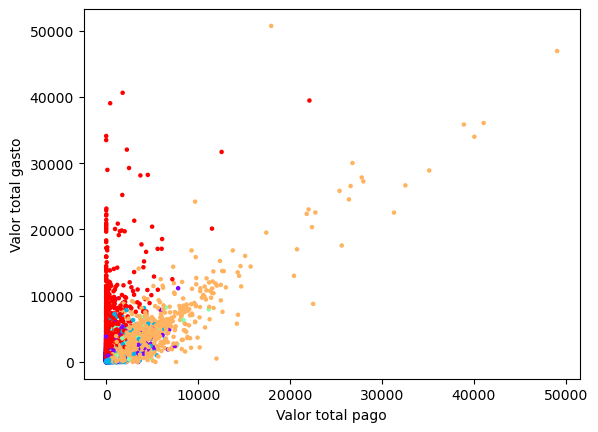

In [15]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

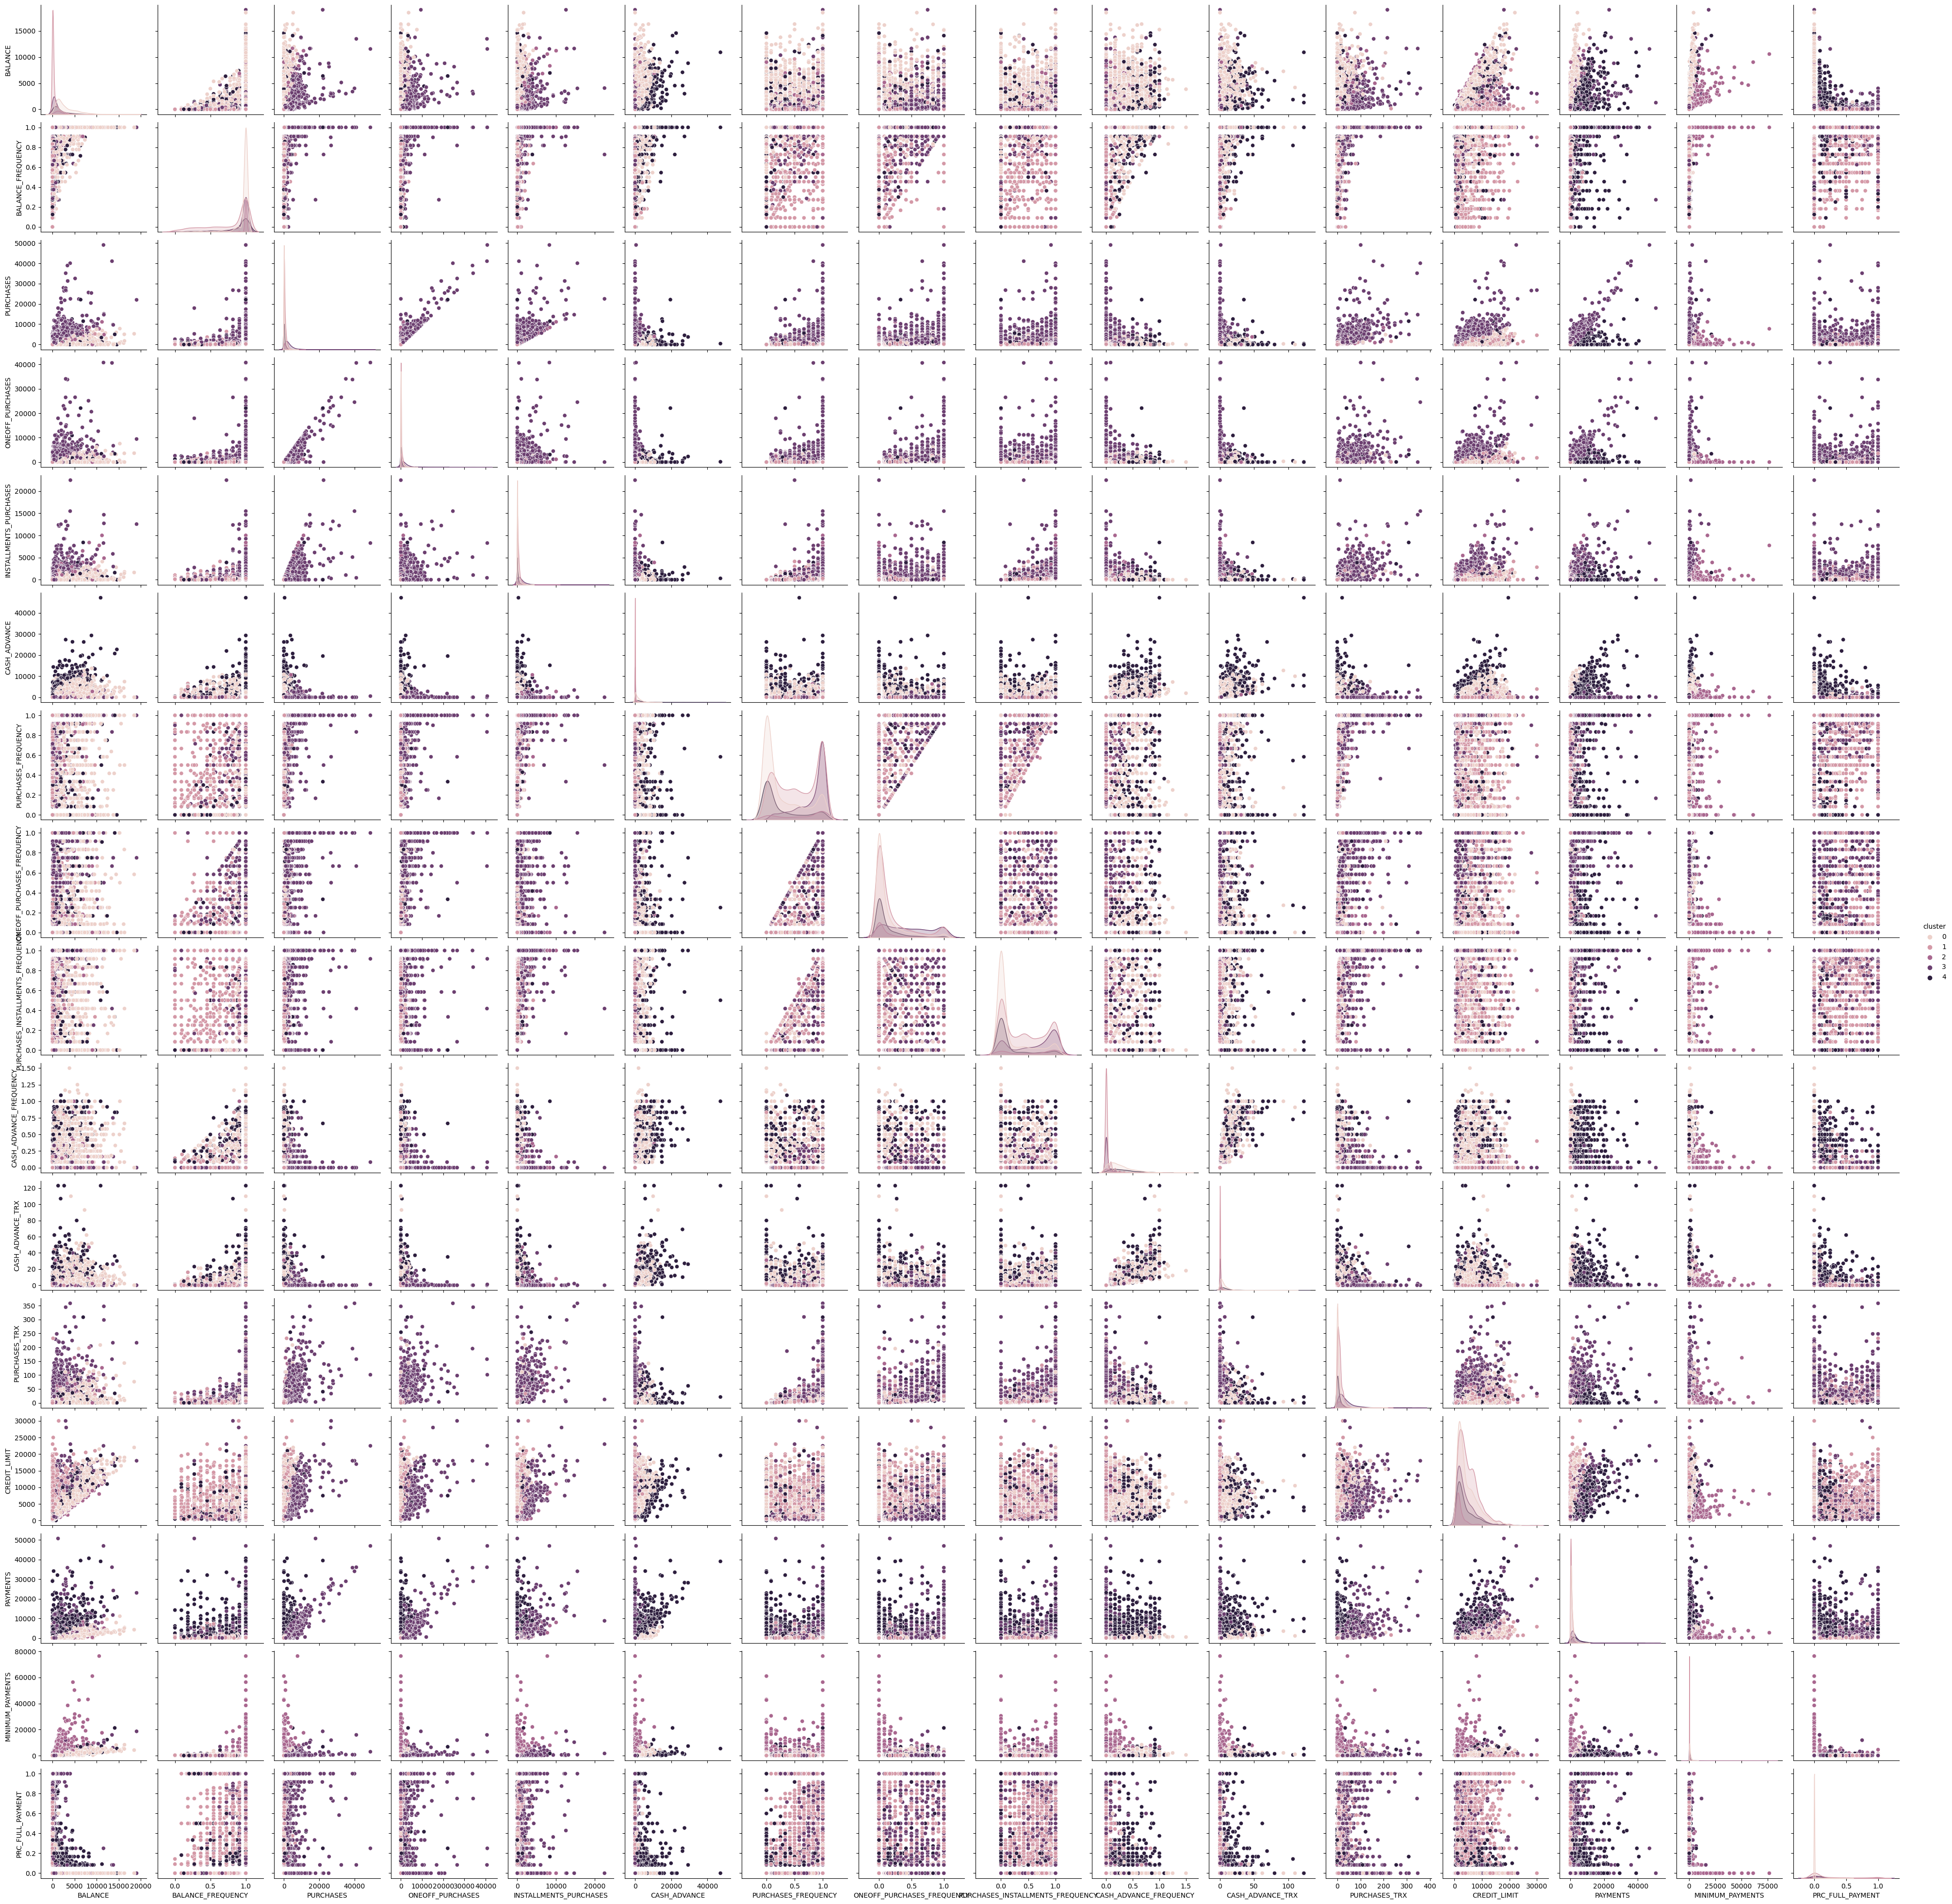

In [16]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster");

In [17]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
1        3276.0   444.212219   846.809334   0.000000    23.287145   
2         412.0  1987.146873  1852.215743  70.794108  1020.146724   
3        1541.0  1140.395363  1663.836536   0.000000   209.490297   
4        1072.0  1794.024195  1982.950586   0.000000   506.925348   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
1          82.992153   411.833075   9630.367575            3276.0  0.774280   
2        1338.918346  2133.415063  11670.179850             412.0  0.989512   
3         552.464447  1369.969909  19043.138560            1541.0  0.928099   
4        1087.920500  2308.762488  14581.459140            1072.0  0.862131   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.593643   8345.641905           2649.0  0.001799   
1        ...       248.900782   4483.503862           3276.0  0.246293   
2        ...      7086.774783  76406.207520            412.0  0.019271   
3        ...       523.422296  18621.013310           1541.0  0.279266   
4        ...       884.718306  21235.065300           1072.0  0.117384   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023260  0.0  0.0  0.000000  0.000000  0.6  
1        0.346454  0.0  0.0  0.000000  0.444444  1.0  
2        0.090795  0.0  0.0  0.000000  0.000000  1.0  
3        0.367477  0.0  0.0  0.083333  0.545455  1.0  
4        0.186853  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [18]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.04289599e-01 2.72275541e-04 6.17031152e-02 3.61472866e-02
  2.55775500e-02 2.52998524e-01 6.73317111e-05 2.56982515e-05
  4.50750034e-05 5.74605324e-05 1.15731022e-03 1.33218565e-03
  7.19155598e-01 1.66164956e-01 1.79275871e-01 5.52512128e-07]
 [6.91172082e-02 2.30558192e-04 1.21221061e-01 4.79941328e-02
  7.33273099e-02 2.43612925e-02 1.72569863e-04 3.36877097e-05
  1.40000012e-04 7.93012041e-06 1.24086835e-04 2.85723913e-03
  9.43757893e-01 1.53487867e-01 5.68276323e-02 7.58208708e-05]
 [3.32972556e-01 2.68240066e-04 1.58923673e-01 3.62178588e-02
  1.23089552e-01 5.82140753e-02 1.66817881e-04 2.64295391e-05
  1.47135264e-04 1.92748591e-05 4.26896159e-04 3.86195702e-03
  3.76646957e-01 2.52402941e-01 6.79571553e-01 4.22964707e-06]
 [1.59738813e-01 2.45539530e-04 4.37899142e-01 2.56417561e-01
  1.81652647e-01 2.57868915e-02 2.04724593e-04 8.88180408e-05
  1.51100049e-04 9.36834144e-06 1.69378578e-04 6.17391999e-03
  6.04768068e-01 4.02440755e-01 8.52026617e-02 7.26174325e-05]
 [2.

In [19]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


In [20]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        3037.962543   385.248630   1636.917210   4495.771989   968.890376
1         444.212219   629.173858    141.655729   5134.705973   814.396458
2        1987.146873   858.326286    420.107194   2226.699029  1338.974045
3        1140.395363  3266.466710    182.900631   4096.794388  3034.900772
4        1794.024195   475.494823   3270.246792   3976.372399  4709.556601


In [21]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
1         444.212219   629.173858    141.655729   5134.705973   814.396458   
2        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
3        1140.395363  3266.466710    182.900631   4096.794388  3034.900772   
4        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   

         n_clients  
cluster             
0             2649  
1             3276  
2              412  
3             1541  
4             1072  


* Cluster 0
    - BALANCE cliente com os maiores valores de gasto;
    - PURCHASES menor valor em compras;
    - CASH_ADVANCE valor considerável em saques;<br>
    **Comparar PAYMENTS com BALANCE e PRC_FULL_PAYMENT que é o percentual pago da fatura**<br>
    - PAYMENTS piores pagadores;

* Cluster 1 
    - BALANCE cliente com os menores valores de gasto;
    - CASH_ADVANCE menor valor em saque;
    - CREDIT_LIMIT clientes com maior limite de crédito;<br>
    **Comparar PAYMENTS com BALANCE e PRC_FULL_PAYMENT que é o percentual pago da fatura**<br>
    - PAYMENTS bons pagadores;

* Cluster 2
    - CREDIT_LIMIT cliente com o menor crédito;<br>
    **Comparar PAYMENTS com BALANCE e PRC_FULL_PAYMENT que é o percentual pago da fatura**<br>
    - PAYMENTS não são bons pagadores;

* Cluster 3
    - PURCHASES maior valor em compras com grande diferença;<br>
    **Comparar PAYMENTS com BALANCE e PRC_FULL_PAYMENT que é o percentual pago da fatura**<br>
    - PAYMENTS melhores pagadores;
    
* Cluster 4
    - CASH_ADVANCE maior valor de saque;<br>
    **Comparar PAYMENTS com BALANCE e PRC_FULL_PAYMENT que é o percentual pago da fatura**<br>
    - PAYMENTS paga as vezes;

In [22]:
# Percetual de pagamento da fatura
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        2649.0  0.001799  0.023260  0.0  0.0  0.000000  0.000000  0.6
1        3276.0  0.246293  0.346454  0.0  0.0  0.000000  0.444444  1.0
2         412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0
3        1541.0  0.279266  0.367477  0.0  0.0  0.083333  0.545455  1.0
4        1072.0  0.117384  0.186853  0.0  0.0  0.083333  0.142857  1.0